In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
# load all of the html files names from /data/raw-html-games
html_files = os.listdir('data/raw-html-games')
print('loaded {} html files'.format(len(html_files)))

loaded 2448 html files


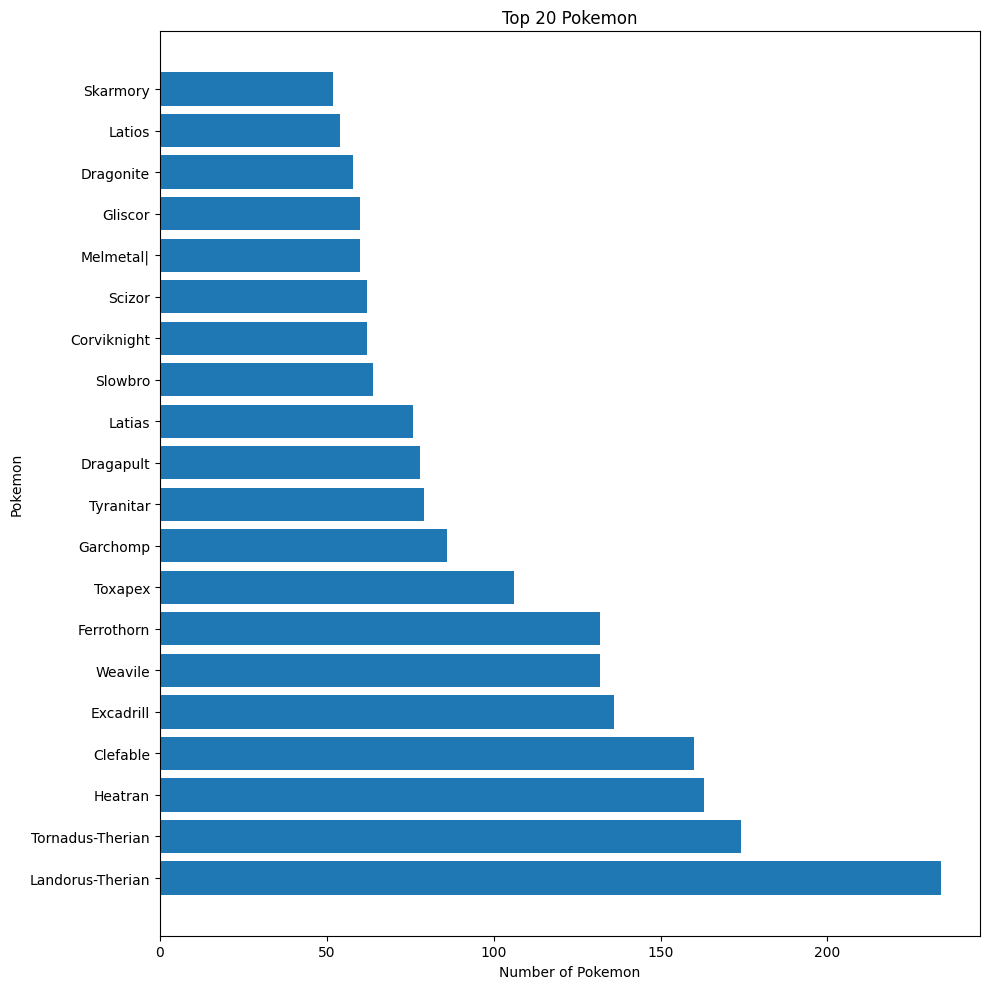

In [8]:
def get_pokemon_counts(html_file):
    '''
    takes a html file and returns a dictionary of pokemon counts
    '''
    # read in the html file
    html = open('data/raw-html-games/' + html_file, 'r').read()
   

    # pars the file as a string, |poke|p1| or |poke|p2| will have the name directly after it
    # ending in a comma
    # we can use this to find the pokemon names

    pokemons = {}

    for line in html.split('\n'):
        if '|poke|p1|' in line:
            name = line.split('|poke|p1|')[1].split(',')[0]
        elif '|poke|p2|' in line:
            name = line.split('|poke|p2|')[1].split(',')[0]
        else:
            continue

        if name not in pokemons.keys():
            pokemons[name] = 0
        pokemons[name] += 1

    return pokemons


pokemons = {}

for html_file in html_files:
    # get the pokemon counts for each game
    game_pokemons = get_pokemon_counts(html_file)

    # add the game pokemons to the total pokemon counts
    for pokemon in game_pokemons.keys():
        if pokemon not in pokemons.keys():
            pokemons[pokemon] = 0
        pokemons[pokemon] += game_pokemons[pokemon]

        
# sort by the value desc
pokemons = {k: v for k, v in sorted(pokemons.items(), key=lambda item: item[1], reverse=True)}

# plot the top pokemon
plt.figure(figsize=(10, 10))
plt.barh(list(pokemons.keys())[:20], list(pokemons.values())[:20])
plt.title('Top 20 Pokemon')
plt.xlabel('Number of Pokemon')
plt.ylabel('Pokemon')
plt.tight_layout()
plt.show()